# Notebook for editing and working with midi data in python

In [5]:
# 2x main functions that need to be fleshed out initially: 
import pretty_midi
import pandas as pd

def midi_to_dataframe(midi_file_path):
    # converts midi into a pandas dataframe in the form below

    #Instrument	Note Number	Start Time	End Time	Velocity	time signature
    #0	Acoustic Grand Piano	60	0.00	0.25	100	        4/4
    #1	Acoustic Grand Piano	64	0.25	0.50	100	        4/4
    #2	Acoustic Grand Piano	69	0.50	0.75	100	        4/4
    #3	Acoustic Grand Piano	71	0.75	1.00	100	        4/4
    #4	Acoustic Grand Piano	72	1.00	1.25	100	        4/4
    #5	Acoustic Grand Piano	63	1.25	1.50	100	        4/4
    #6	Acoustic Grand Piano	71	1.50	1.75	100	        4/4
    #7	Acoustic Grand Piano	69	1.75	2.00	100	        4/4

    data = []
    # Load the MIDI file with pretty_midi
    midi_data = pretty_midi.PrettyMIDI(midi_file_path)
    # Extract time signature changes
    ts = midi_data.time_signature_changes

    for i, instrument in enumerate(midi_data.instruments):
        # Print information about each note in the instrument
        for j, note in enumerate(instrument.notes):

            note_data = {
                'Instrument': pretty_midi.program_to_instrument_name(instrument.program),
                'Note Number': note.pitch,
                'Start Time': note.start,
                'End Time': note.end,
                'Velocity': note.velocity,
                'Time Signature': f"{ts[0].numerator}/{ts[0].denominator}"
            }
            data.append(note_data)
            
    # Create a pandas DataFrame
    return pd.DataFrame(data)

def dataframe_to_midi(df):
    # converts midi from the form below into a useable midi file

    #Instrument	Note Number	Start Time	End Time	Velocity	time signature
    #0	Acoustic Grand Piano	60	0.00	0.25	100	        4/4
    #1	Acoustic Grand Piano	64	0.25	0.50	100	        4/4
    #2	Acoustic Grand Piano	69	0.50	0.75	100	        4/4
    #3	Acoustic Grand Piano	71	0.75	1.00	100	        4/4
    #4	Acoustic Grand Piano	72	1.00	1.25	100	        4/4
    #5	Acoustic Grand Piano	63	1.25	1.50	100	        4/4
    #6	Acoustic Grand Piano	71	1.50	1.75	100	        4/4
    #7	Acoustic Grand Piano	69	1.75	2.00	100	        4/4

    # Create a PrettyMIDI object
    midi_data = pretty_midi.PrettyMIDI()

    # Create an instrument for each unique instrument in the DataFrame
    instruments = df['Instrument'].unique()
    for instrument_name in instruments:
        program = pretty_midi.instrument_name_to_program(instrument_name)
        instrument = pretty_midi.Instrument(program=program)
        midi_data.instruments.append(instrument)

    # Add notes to each instrument
    for _, row in df.iterrows():
        instrument_name = row['Instrument']
        program = pretty_midi.instrument_name_to_program(instrument_name)
        instrument = midi_data.instruments[program]

        note = pretty_midi.Note(
            velocity=int(row['Velocity']),
            pitch=int(row['Note Number']),
            start=float(row['Start Time']),
            end=float(row['End Time'])
        )
        instrument.notes.append(note)

    return midi_data

In [11]:
import mido

midi_file_path = 'example-midi-files/example-midi-clip.mid'

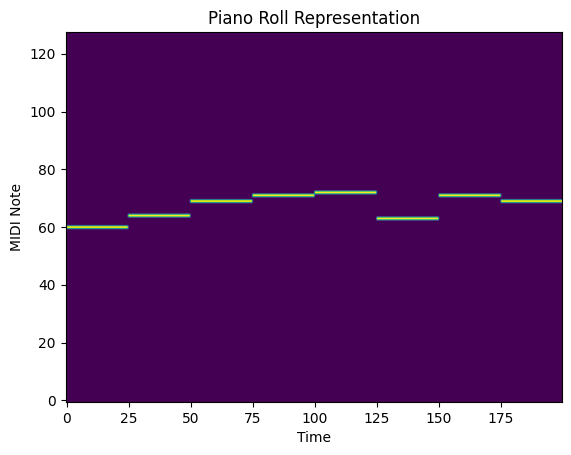

In [10]:
import pretty_midi
import matplotlib.pyplot as plt

# Load the MIDI file
midi_data = pretty_midi.PrettyMIDI(midi_file_path)

# Get the piano roll representation
piano_roll = midi_data.get_piano_roll()

# Plot the piano roll
plt.imshow(piano_roll, aspect='auto', origin='lower', cmap='viridis')
plt.xlabel('Time')
plt.ylabel('MIDI Note')
plt.title('Piano Roll Representation')
plt.show()

In [14]:
midi_data = mido.MidiFile(midi_file_path)

print(midi_data)

MidiFile(type=0, ticks_per_beat=96, tracks=[
  MidiTrack([
    MetaMessage('track_name', name='', time=0),
    MetaMessage('time_signature', numerator=4, denominator=4, clocks_per_click=36, notated_32nd_notes_per_beat=8, time=0),
    MetaMessage('time_signature', numerator=4, denominator=4, clocks_per_click=36, notated_32nd_notes_per_beat=8, time=0),
    Message('note_on', channel=0, note=60, velocity=100, time=0),
    Message('note_off', channel=0, note=60, velocity=64, time=48),
    Message('note_on', channel=0, note=64, velocity=100, time=0),
    Message('note_off', channel=0, note=64, velocity=64, time=48),
    Message('note_on', channel=0, note=69, velocity=100, time=0),
    Message('note_off', channel=0, note=69, velocity=64, time=48),
    Message('note_on', channel=0, note=71, velocity=100, time=0),
    Message('note_off', channel=0, note=71, velocity=64, time=48),
    Message('note_on', channel=0, note=72, velocity=100, time=0),
    Message('note_on', channel=0, note=63, veloci

In [15]:
midi_data = pretty_midi.PrettyMIDI(midi_file_path)

# Print general information about the MIDI file
print(f"Ticks per beat: {midi_data.resolution}")
print(f"Number of instruments: {len(midi_data.instruments)}")

# Print information about each instrument
for i, instrument in enumerate(midi_data.instruments):
    print(f"\nInstrument {i + 1}: {pretty_midi.program_to_instrument_name(instrument.program)}")
    print(f"Is drum: {instrument.is_drum}")
    print(f"Number of notes: {len(instrument.notes)}")

Ticks per beat: 96
Number of instruments: 1

Instrument 1: Acoustic Grand Piano
Is drum: False
Number of notes: 8


In [16]:
# Load the MIDI file with pretty_midi
midi_data = pretty_midi.PrettyMIDI(midi_file_path)

# Iterate over instruments
for i, instrument in enumerate(midi_data.instruments):
    print(f"\nInstrument {i + 1}: {pretty_midi.program_to_instrument_name(instrument.program)}")
    print(f"Is drum: {instrument.is_drum}")
    print(f"Number of notes: {len(instrument.notes)}")
    print(f"Channel: {instrument.program}")  # Channel information

    # Print information about each note in the instrument
    for j, note in enumerate(instrument.notes):
        print(f"  Note {j + 1}: Pitch: {note.pitch}, Start: {note.start}, End: {note.end}, Velocity: {note.velocity}")


Instrument 1: Acoustic Grand Piano
Is drum: False
Number of notes: 8
Channel: 0
  Note 1: Pitch: 60, Start: 0.0, End: 0.25, Velocity: 100
  Note 2: Pitch: 64, Start: 0.25, End: 0.5, Velocity: 100
  Note 3: Pitch: 69, Start: 0.5, End: 0.75, Velocity: 100
  Note 4: Pitch: 71, Start: 0.75, End: 1.0, Velocity: 100
  Note 5: Pitch: 72, Start: 1.0, End: 1.25, Velocity: 100
  Note 6: Pitch: 63, Start: 1.25, End: 1.5, Velocity: 100
  Note 7: Pitch: 71, Start: 1.5, End: 1.75, Velocity: 100
  Note 8: Pitch: 69, Start: 1.75, End: 2.0, Velocity: 100


In [40]:
import pandas as pd


def midi_to_dataframe(midi_file_path):
    data = []
    # Load the MIDI file with pretty_midi
    midi_data = pretty_midi.PrettyMIDI(midi_file_path)
    # Extract time signature changes
    ts = midi_data.time_signature_changes

    for i, instrument in enumerate(midi_data.instruments):
        # Print information about each note in the instrument
        for j, note in enumerate(instrument.notes):

            note_data = {
                'Instrument': pretty_midi.program_to_instrument_name(instrument.program),
                'Note Number': note.pitch,
                'Start Time': note.start,
                'End Time': note.end,
                'Velocity': note.velocity,
                'Time Signature': f"{ts[0].numerator}/{ts[0].denominator}"
            }
            data.append(note_data)
            
    # Create a pandas DataFrame
    return pd.DataFrame(data)

midi_df = midi_to_dataframe(midi_file_path)

midi_df


,Instrument,Note Number,Start Time,End Time,Velocity,Time Signature
0,Acoustic Grand Piano,60,0.00,0.25,100,4/4
1,Acoustic Grand Piano,64,0.25,0.50,100,4/4
2,Acoustic Grand Piano,69,0.50,0.75,100,4/4
3,Acoustic Grand Piano,71,0.75,1.00,100,4/4
4,Acoustic Grand Piano,72,1.00,1.25,100,4/4
5,Acoustic Grand Piano,63,1.25,1.50,100,4/4
6,Acoustic Grand Piano,71,1.50,1.75,100,4/4
7,Acoustic Grand Piano,69,1.75,2.00,100,4/4


In [37]:
import pretty_midi
import pandas as pd

def dataframe_to_midi(df):
    # converts midi from the form below into a useable midi file

    #Instrument	Note Number	Start Time	End Time	Velocity	time signature
    #0	Acoustic Grand Piano	60	0.00	0.25	100	        4/4
    #1	Acoustic Grand Piano	64	0.25	0.50	100	        4/4
    #2	Acoustic Grand Piano	69	0.50	0.75	100	        4/4
    #3	Acoustic Grand Piano	71	0.75	1.00	100	        4/4
    #4	Acoustic Grand Piano	72	1.00	1.25	100	        4/4
    #5	Acoustic Grand Piano	63	1.25	1.50	100	        4/4
    #6	Acoustic Grand Piano	71	1.50	1.75	100	        4/4
    #7	Acoustic Grand Piano	69	1.75	2.00	100	        4/4

    # Create a PrettyMIDI object
    midi_data = pretty_midi.PrettyMIDI()

    # Create an instrument for each unique instrument in the DataFrame
    instruments = df['Instrument'].unique()
    for instrument_name in instruments:
        program = pretty_midi.instrument_name_to_program(instrument_name)
        instrument = pretty_midi.Instrument(program=program)
        midi_data.instruments.append(instrument)

    # Add notes to each instrument
    for _, row in df.iterrows():
        instrument_name = row['Instrument']
        program = pretty_midi.instrument_name_to_program(instrument_name)
        instrument = midi_data.instruments[program]

        note = pretty_midi.Note(
            velocity=int(row['Velocity']),
            pitch=int(row['Note Number']),
            start=float(row['Start Time']),
            end=float(row['End Time'])
        )
        instrument.notes.append(note)

    return midi_data

# Example usage:
# Assuming 'midi_dataframe' is your DataFrame
midi_data = dataframe_to_midi(midi_df)

# Save the MIDI file
output_midi_file_path = 'output.mid'
midi_data.write(output_midi_file_path)
